In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
# Reading in the Df
df = pd.read_csv('http://www.football-data.co.uk/mmz4281/2021/E0.csv')
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,3.49,-2.25,1.86,2.04,1.88,2.03,1.98,2.14,1.88,2.00
376,E0,23/05/2021,16:00,Man City,Everton,5,0,H,2,0,...,2.77,-1.75,2.01,1.89,1.99,1.89,2.20,2.00,2.03,1.85
377,E0,23/05/2021,16:00,Sheffield United,Burnley,1,0,H,1,0,...,2.05,0.00,2.04,1.86,2.05,1.86,2.17,1.90,2.03,1.84
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,H,2,0,...,2.14,-0.75,2.00,1.90,2.02,1.91,2.06,2.01,1.99,1.89


**Finding number of goals for Home Team**

In [4]:
#slicing the df son we can find the number of goals from a Home Team
hometeam = df.loc[:,['HomeTeam','FTHG']]

In [5]:
# Grouping the home teams and summing
hometeam = hometeam.groupby('HomeTeam',as_index = False)['FTHG'].sum().sort_values(by = 'FTHG', ascending=True)
hometeam

,HomeTeam,FTHG
7,Fulham,9
14,Sheffield United,12
3,Burnley,14
17,West Brom,15
5,Crystal Palace,20
19,Wolves,21
2,Brighton,22
0,Arsenal,24
6,Everton,24
13,Newcastle,26


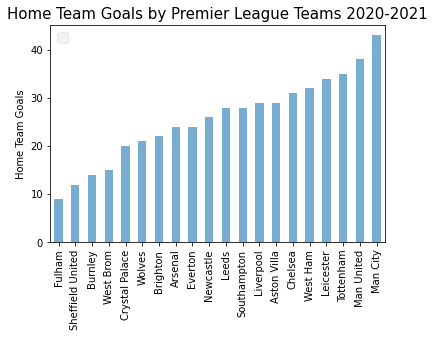

In [6]:
# plotting the number of goals
hometeam.plot(kind= 'bar', x = 'HomeTeam', y='FTHG',alpha =0.6)
plt.style.use('fivethirtyeight')
plt.ylabel('Home Team Goals')
plt.xticks(rotation=90)
plt.legend('')
plt.xlabel('')
plt.title('Home Team Goals by Premier League Teams 2020-2021',fontsize=15)
plt.legend('')
plt.rcParams.update({'font.size':10})

**Finding the # of Away Team Goals**

In [7]:
# Slicing the Data
awayteam = df.loc[:,['AwayTeam','FTAG']]

In [8]:
# Finding the number of away team goals
awayteam = awayteam.groupby('AwayTeam',as_index = False)['FTAG'].sum().sort_values(by = 'FTAG', ascending=True)

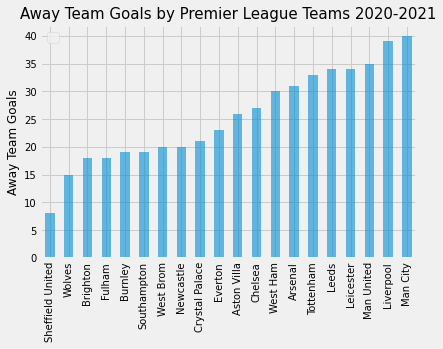

In [9]:
# plotting the DF
awayteam.plot(kind= 'bar', x = 'AwayTeam', y='FTAG',alpha = 0.6)
plt.style.use('fivethirtyeight')
plt.ylabel('Away Team Goals')
plt.xticks(rotation=90)
plt.title('Away Team Goals by Premier League Teams 2020-2021',fontsize=15)
plt.legend('')
plt.xlabel('')
plt.rcParams.update({'font.size':10})


**How many teams that are winning by half time, win full time**

In [10]:
# Slicing the df 
result = df.loc[:,['FTR','HTR']]

In [11]:
#Finding where the results are the same 
resultSame = result[result['FTR']== result['HTR']].reset_index().sort_index()

In [12]:
# Dropping the result Same column
resultSame = resultSame.drop(columns = 'index')

In [13]:
# starting from the index of 1 instead of 0
result.index += 1
resultSame.index += 1

In [14]:
# Finding the last index (the last game)
resultSame = resultSame.index.values[-1]
resultSame

232

In [15]:
# Finding the last index (the last game)
result = result.index.values[-1]
result

380

In [16]:
# Finding the number of games where the result was different 
result = result - resultSame 
result

148

In [17]:
# Getting the parameters ready for the pie chart
list1 = [result,resultSame]
labels1 = ['Result Changed', 'Result Stayed the Same']
colors = ['#7590a3','lightblue']

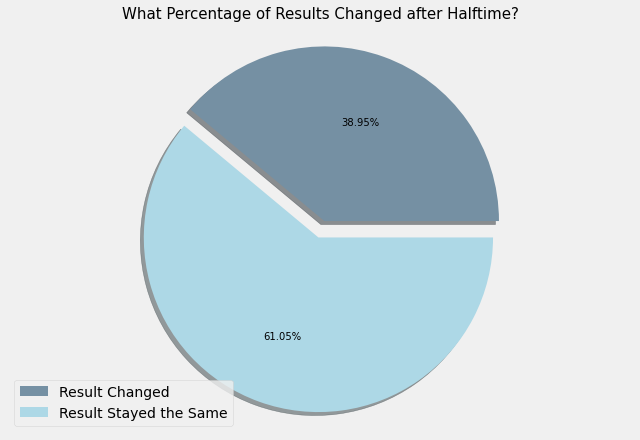

In [18]:
# Plotting the pie chart
fig = plt.figure(figsize =(10, 7)) 
plt.pie(list1, explode = [0,0.1],autopct='%.2f%%', colors= colors,shadow = True) 
plt.style.use('fivethirtyeight')
plt.title('What Percentage of Results Changed after Halftime?',fontsize=15)
plt.axis('equal')
plt.legend(labels1, loc='lower left')

**Finding the number of goals scored**

In [19]:
# Cleaning the data to find the number of goals scored 
numberofgoalscoredaway= awayteam.sort_values(by = 'AwayTeam', ascending=True)
numberofgoalscoredhome = hometeam.sort_values(by = 'HomeTeam', ascending=True)
numberofgoalscored = numberofgoalscoredhome.join(numberofgoalscoredaway)
numberofgoalscored['Total Goals Scored'] = numberofgoalscored.FTHG + numberofgoalscored.FTAG
numberofgoalscored = numberofgoalscored.drop(columns= ['HomeTeam'])
numberofgoalscored['Team']  = numberofgoalscored['AwayTeam']
numberofgoalscored = numberofgoalscored.drop(columns = 'AwayTeam')

In [20]:
# reordering columns
numberofgoalscored = numberofgoalscored[['Team','FTAG','FTHG','Total Goals Scored']]
numberofgoalscored

,Team,FTAG,FTHG,Total Goals Scored
0,Arsenal,31,24,55
1,Aston Villa,26,29,55
2,Brighton,18,22,40
3,Burnley,19,14,33
4,Chelsea,27,31,58
5,Crystal Palace,21,20,41
6,Everton,23,24,47
7,Fulham,18,9,27
8,Leeds,34,28,62
9,Leicester,34,34,68


In [21]:
# Starting another dataframe to find the number of goals conceded 
mostgoalsconceded = df.loc[:,['HomeTeam', 'AwayTeam',	'FTHG',	'FTAG']]

In [22]:
# Finding the number of goals conceded by summing the total # of goals conceded at home and away
hometeamconceded = mostgoalsconceded.groupby('HomeTeam',as_index = False)['FTAG'].sum().sort_values(by = 'FTAG', ascending=True)
awayteamconceded = mostgoalsconceded.groupby('AwayTeam',as_index = False)['FTHG'].sum().sort_values(by = 'FTHG', ascending=True)

In [23]:
# Finding the numbe of goals conceded and cleaning the data
totalgoalsconceded = awayteamconceded.join(hometeamconceded)
totalgoalsconceded['Team'] = totalgoalsconceded['AwayTeam']
totalgoalsconceded = totalgoalsconceded.drop(columns= ['HomeTeam','AwayTeam'])
totalgoalsconceded['Total Goals Conceded'] = totalgoalsconceded.FTHG + totalgoalsconceded.FTAG
totalgoalsconceded = totalgoalsconceded[['Team','FTHG','FTAG','Total Goals Conceded']]
totalgoalsconceded

,Team,FTHG,FTAG,Total Goals Conceded
11,Man City,15,17,32
12,Man United,16,28,44
0,Arsenal,18,21,39
4,Chelsea,18,18,36
1,Aston Villa,19,27,46
6,Everton,20,28,48
9,Leicester,20,30,50
10,Liverpool,22,20,42
2,Brighton,24,22,46
7,Fulham,25,28,53


In [24]:
mosteffectiveteam = totalgoalsconceded.join(numberofgoalscored['Total Goals Scored'])
mosteffectiveteam = mosteffectiveteam.reset_index()
mosteffectiveteam = mosteffectiveteam.drop(columns='index')
mosteffectiveteam = mosteffectiveteam.drop(columns= ['FTAG','FTHG'])
mosteffectiveteam.iloc[7,0] = 'T.H.'
mosteffectiveteam['Goals/Conceded Goals'] = mosteffectiveteam['Total Goals Scored']/ mosteffectiveteam['Total Goals Conceded']
mosteffectiveteam = mosteffectiveteam.sort_values(by='Goals/Conceded Goals',ascending=True)
mosteffectiveteam

,Team,Total Goals Conceded,Total Goals Scored,Goals/Conceded Goals
17,Sheffield United,63,20,0.317460
18,West Brom,76,35,0.460526
9,Fulham,53,27,0.509434
13,Burnley,55,33,0.600000
16,Crystal Palace,66,41,0.621212
19,Southampton,68,47,0.691176
12,Wolves,52,36,0.692308
14,Newcastle,62,46,0.741935
8,Brighton,46,40,0.869565
5,Everton,48,47,0.979167


In [25]:
# Creating a color map for the scatterplot
colors = cm.Blues(np.linspace(0,1,len(mosteffectiveteam)))

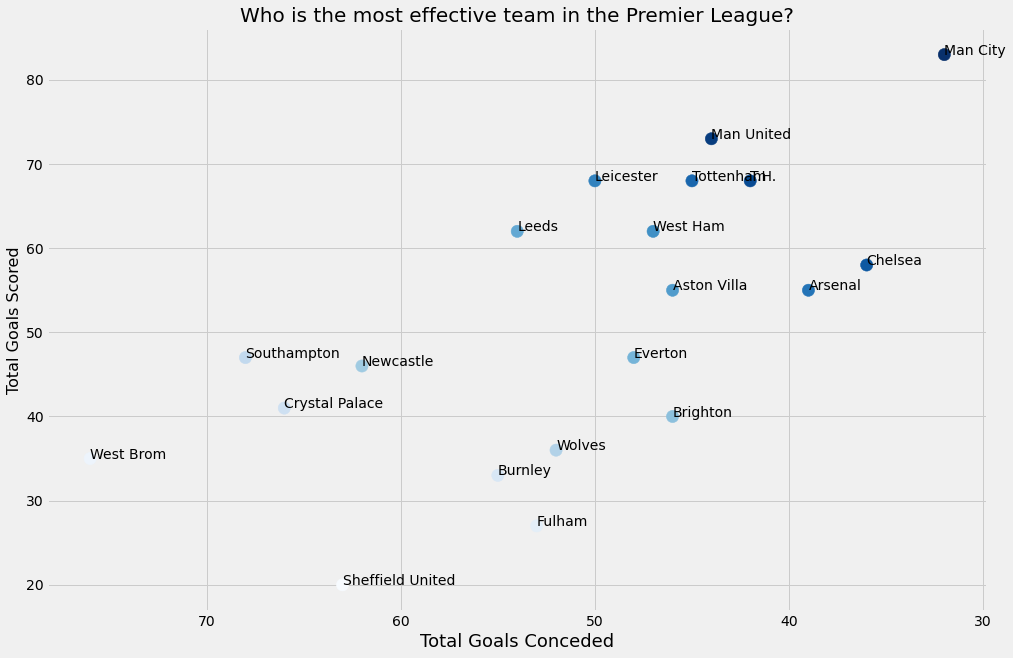

In [26]:
# Plotting the most effective team 
ax = mosteffectiveteam.plot(x = 'Total Goals Conceded', y = 'Total Goals Scored', kind = 'scatter', s = 150, figsize = (15,10),color = colors)
# Plotting the labels for the scatter plot
mosteffectiveteam[['Total Goals Conceded','Total Goals Scored','Team']].apply(lambda x: ax.text(*x),axis=1)
# making the labels bigger
plt.rcParams.update({'font.size': 14})
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#inverting x axis so the least number of goals is on the right side instead of left 
plt.gca().invert_xaxis()
plt.xlabel('Total Goals Conceded', fontsize=18)
plt.ylabel('Total Goals Scored', fontsize=16)
cmap = cm.get_cmap('Spectral')
plt.title('Who is the most effective team in the Premier League?', fontsize= 20)
plt.show()